In [278]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [279]:
!pip3 install scikit-learn

In [280]:
data = pd.read_csv("car data.csv")

In [281]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [282]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


/var/folders/y6/cx5733q519b0g8786lwdyd05rslmmw/T/ipykernel_4425/667355758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


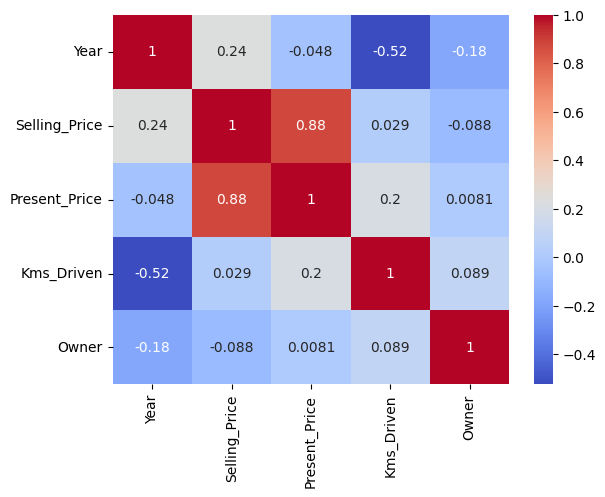

In [283]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [284]:
data['age']= (2022 - data['Year'])

In [285]:
data['age'].head()

0     8
1     9
2     5
3    11
4     8
Name: age, dtype: int64

In [286]:
data.drop('Year',axis=1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [287]:
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
age               16
dtype: int64

In [288]:
data["Transmission"]= data["Transmission"].replace({'Manual': 0 ,'Automatic':1 })

In [289]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,0,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,0,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,0,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,0,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,0,0,8


In [290]:
print(data['Seller_Type'].unique())

['Dealer' 'Individual']


In [291]:
data['Seller_Type'] = data['Seller_Type'].replace({'Dealer':0,'Individual':1})

In [292]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [293]:
data['Fuel_Type'] = data['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2})

In [294]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189,8.372093
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000,10.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000,19.000000


In [295]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,8
1,sx4,2013,4.75,9.54,43000,1,0,0,0,9
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,5
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,11
4,swift,2014,4.60,6.87,42450,1,0,0,0,8


In [296]:
for i in data.columns:
    print(data[i].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [297]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'age'],
      dtype='object')

In [298]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,8
1,sx4,2013,4.75,9.54,43000,1,0,0,0,9
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,5
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,11
4,swift,2014,4.60,6.87,42450,1,0,0,0,8


In [299]:
data= data.drop('Year', axis=1 )

In [300]:
print(data)

    Car_Name  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz           3.35           5.59       27000          0   
1        sx4           4.75           9.54       43000          1   
2       ciaz           7.25           9.85        6900          0   
3    wagon r           2.85           4.15        5200          0   
4      swift           4.60           6.87       42450          1   
..       ...            ...            ...         ...        ...   
296     city           9.50          11.60       33988          1   
297     brio           4.00           5.90       60000          0   
298     city           3.35          11.00       87934          0   
299     city          11.50          12.50        9000          1   
300     brio           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  age  
0              0             0      0    8  
1              0             0      0    9  
2              0             0      

In [301]:
Y = data.iloc[:,1]
data.drop('Selling_Price',axis=1,inplace= True)
X=data.iloc[:,:]

In [302]:

Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [303]:
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,5.59,27000,0,0,0,0,8
1,sx4,9.54,43000,1,0,0,0,9
2,ciaz,9.85,6900,0,0,0,0,5
3,wagon r,4.15,5200,0,0,0,0,11
4,swift,6.87,42450,1,0,0,0,8


In [304]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .15)

In [306]:
import xgboost as xgb

# Define a gradient boosting regressor with default hyperparameters
reg = xgb.XGBRegressor()

# Train the regressor on the training data
reg.fit(X_train, Y_train)

# Predict the target variable on the test data
y_pred = reg.predict(X_test)

In [305]:
X_train.drop('Car_Name',axis=1,inplace = True)
X_test.drop('Car_Name',axis=1,inplace = True)

In [307]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.7708037053434037

<Axes: xlabel='Selling_Price', ylabel='Count'>

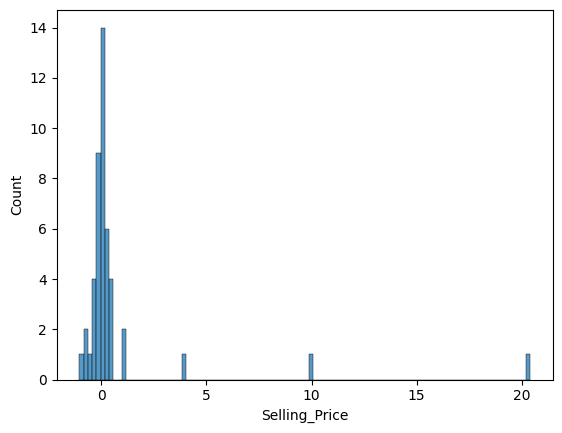

In [308]:
sns.histplot(Y_test-y_pred)

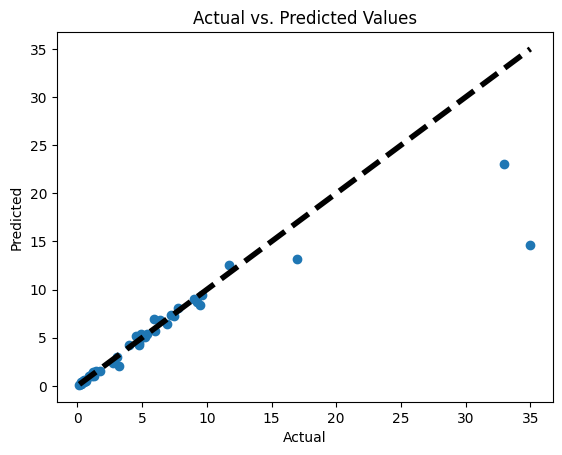

In [309]:
import matplotlib.pyplot as plt

# create scatter plot of actual vs. predicted values
plt.scatter(Y_test, y_pred)

# add a line for perfect correlation (y = x)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)

# set axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# show the plot
plt.show()

In [310]:
Y_test_sorted = np.sort(Y_test)[::-1]

In [311]:
y_pred = reg.predict(X_test)

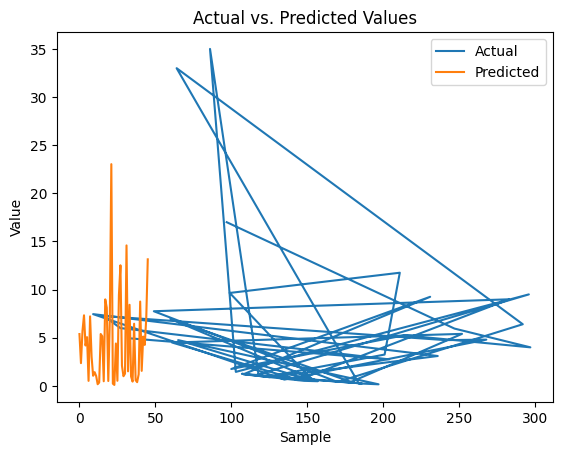

In [312]:
import matplotlib.pyplot as plt

# create line plot of actual and predicted values
plt.plot(Y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

# set axis labels and title
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')

# add legend
plt.legend()

# show the plot
plt.show()

In [313]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define a neural network with a single hidden layer and a regression output layer
model = Sequential([
    Dense(128, activation='relu', input_shape=(7,)),
    Dense(1)
])

# Compile the model with a mean squared error loss and an Adam optimizer
model.compile(loss='mse', optimizer='adam')

# Train the model on the training data
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
8/8 [==============================] - 0s 664us/step - loss: 817267.6250
Epoch 2/20
8/8 [==============================] - 0s 699us/step - loss: 106082.8047
Epoch 3/20
8/8 [==============================] - 0s 734us/step - loss: 35528.1445
Epoch 4/20
8/8 [==============================] - 0s 749us/step - loss: 51157.4258
Epoch 5/20
8/8 [==============================] - 0s 688us/step - loss: 69101.6328
Epoch 6/20
8/8 [==============================] - 0s 681us/step - loss: 37196.0859
Epoch 7/20
8/8 [==============================] - 0s 648us/step - loss: 31646.4824
Epoch 8/20
8/8 [==============================] - 0s 625us/step - loss: 59050.3242
Epoch 9/20
8/8 [==============================] - 0s 639us/step - loss: 24841.0195
Epoch 10/20
8/8 [==============================] - 0s 622us/step - loss: 9600.1924
Epoch 11/20
8/8 [==============================] - 0s 654us/step - loss: 21675.5938
Epoch 12/20
8/8 [==============================] - 0s 637us/step - loss: 4748.0547
E

In [314]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


In [315]:
r2_score(Y_test,y_pred)

-0.8553278968721021

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# create the model
model = LinearRegression()

# fit the model to the data
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate R2 score
r2 = r2_score(Y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.8578995922216646


<Axes: xlabel='Selling_Price', ylabel='Count'>

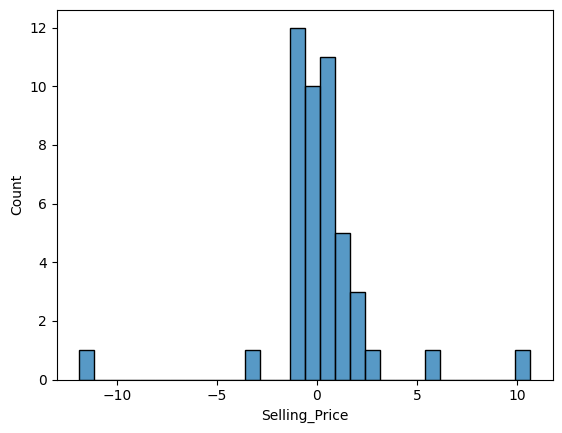

In [317]:
sns.histplot(Y_test-y_pred)

In [318]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# create the model with alpha=1 (default)
model = Ridge()

# fit the model to the data
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate R2 score
r2 = r2_score(Y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.8564791600823201


<Axes: xlabel='Selling_Price', ylabel='Count'>

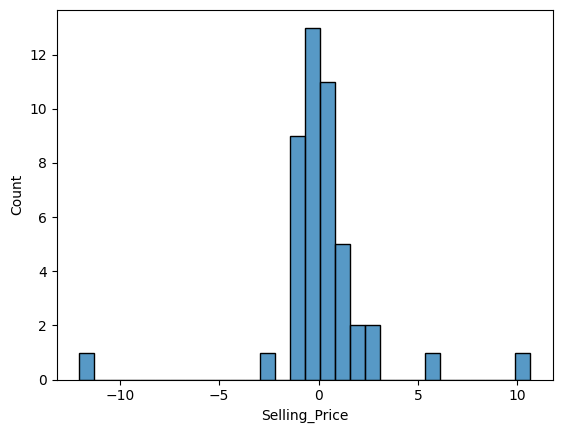

In [319]:
sns.histplot(Y_test-y_pred)

In [320]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# create the model with alpha=1 (default)
model = Lasso()

# fit the model to the data
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate R2 score
r2 = r2_score(Y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.80843922008413


<Axes: xlabel='Selling_Price', ylabel='Count'>

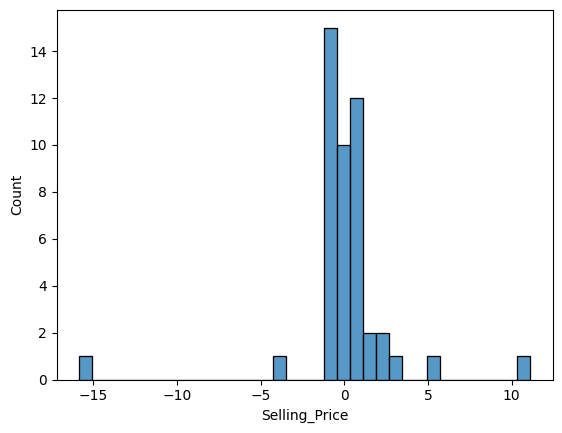

In [321]:
sns.histplot(Y_test-y_pred)

In [322]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# create the model with a linear kernel
model = SVR(kernel='linear')

# fit the model to the data
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate R2 score
r2 = r2_score(Y_test, y_pred)

print("R2 score:", r2)

R2 score: -376.32319536776345


<Axes: xlabel='Selling_Price', ylabel='Count'>

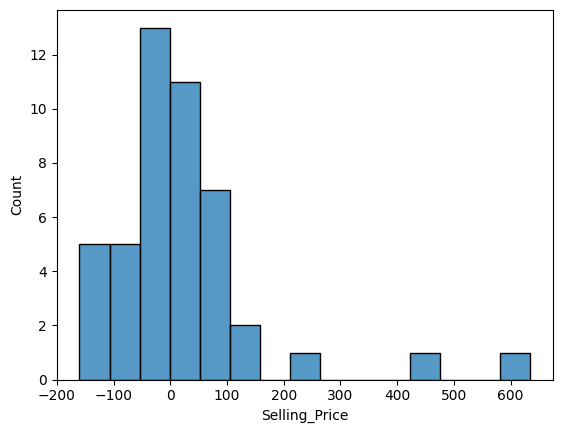

In [323]:
sns.histplot(Y_test-y_pred)

In [324]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# create the model
model = DecisionTreeRegressor()

# fit the model to the data
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate R2 score
r2 = r2_score(Y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.8311651648091439


<Axes: xlabel='Selling_Price', ylabel='Count'>

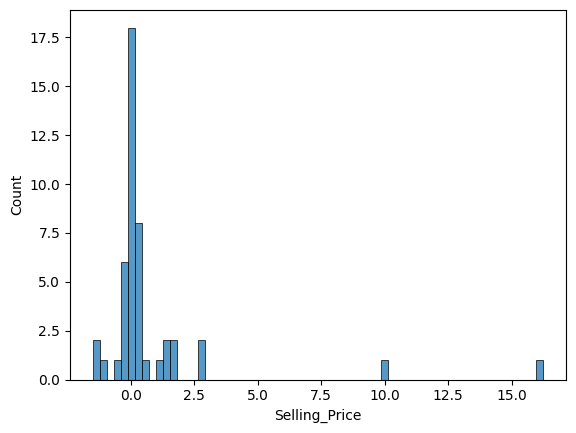

In [325]:
sns.histplot(Y_test-y_pred)

In [326]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# create the model with 100 trees
model = RandomForestRegressor(n_estimators=100)

# fit the model to the data
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate R2 score
r2 = r2_score(Y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.7831040058122657


<Axes: xlabel='Selling_Price', ylabel='Count'>

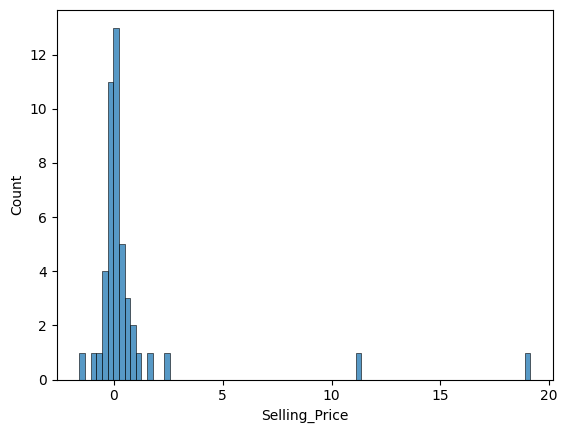

In [327]:
sns.histplot(Y_test-y_pred)

In [328]:
# add a bias term to the feature matrix
X_train = np.concatenate([X_train, np.ones((len(X_train), 1))], axis=1)
X_test = np.concatenate([X_test, np.ones((len(X_test), 1))], axis=1)

# define the Bayesian linear regression model
num_features = X_train.shape[1]
alpha = 2.0
beta = 25.0
sigma = 1.0 / np.sqrt(alpha)

# initialize the model parameters
m = np.zeros(num_features)
S_inv = alpha * np.eye(num_features)

# set the number of iterations and the learning rate
num_iterations = 50
learning_rate = 0.05

# iterate over the training set
for i in range(num_iterations):
    # calculate the posterior mean of the model parameters
    S = np.linalg.inv(S_inv)
    m = beta * np.matmul(S, np.matmul(X_train.T, Y_train))
    
    # calculate the posterior covariance matrix of the model parameters
    S_inv = alpha * np.eye(num_features) + beta * np.matmul(X_train.T, X_train)
    S_inv = S_inv + learning_rate * np.eye(num_features)
    
# make predictions on the test set
predictions = np.matmul(X_test, m)

# calculate the R-squared score
r2 = r2_score(Y_test, predictions)
print("R-squared score:", r2)

R-squared score: 0.857424632732046


<Axes: xlabel='Selling_Price', ylabel='Count'>

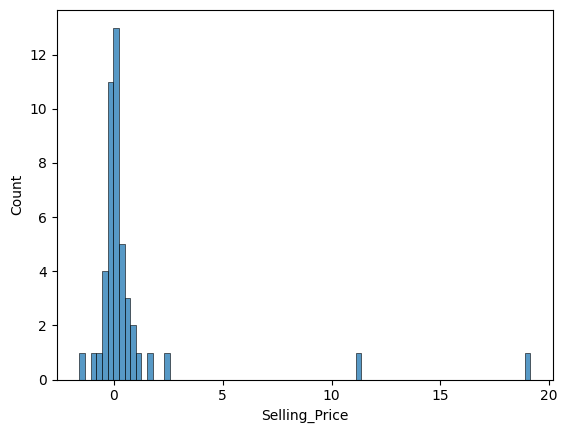

In [329]:
sns.histplot(Y_test-y_pred)